In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use('default')

In [105]:
df = pd.read_csv('../data/credit_risk_dataset.csv')
print(df.shape)
display(df.head())

(32581, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [106]:
df['loan_status'] = df['loan_status'].astype('object')
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                    object
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [108]:
missing_df = (
    df.isna().sum()
      .to_frame('Missing Count')
      .assign(Percentage=lambda x: x['Missing Count']/len(df)*100)
      .query("`Missing Count` > 0")
)
print(missing_df)

                   Missing Count  Percentage
person_emp_length            895    2.747000
loan_int_rate               3116    9.563856


In [109]:
dropna_df = df.dropna()
print(f"Dropped {len(df) - len(dropna_df)} rows with missing values.")

Dropped 3943 rows with missing values.


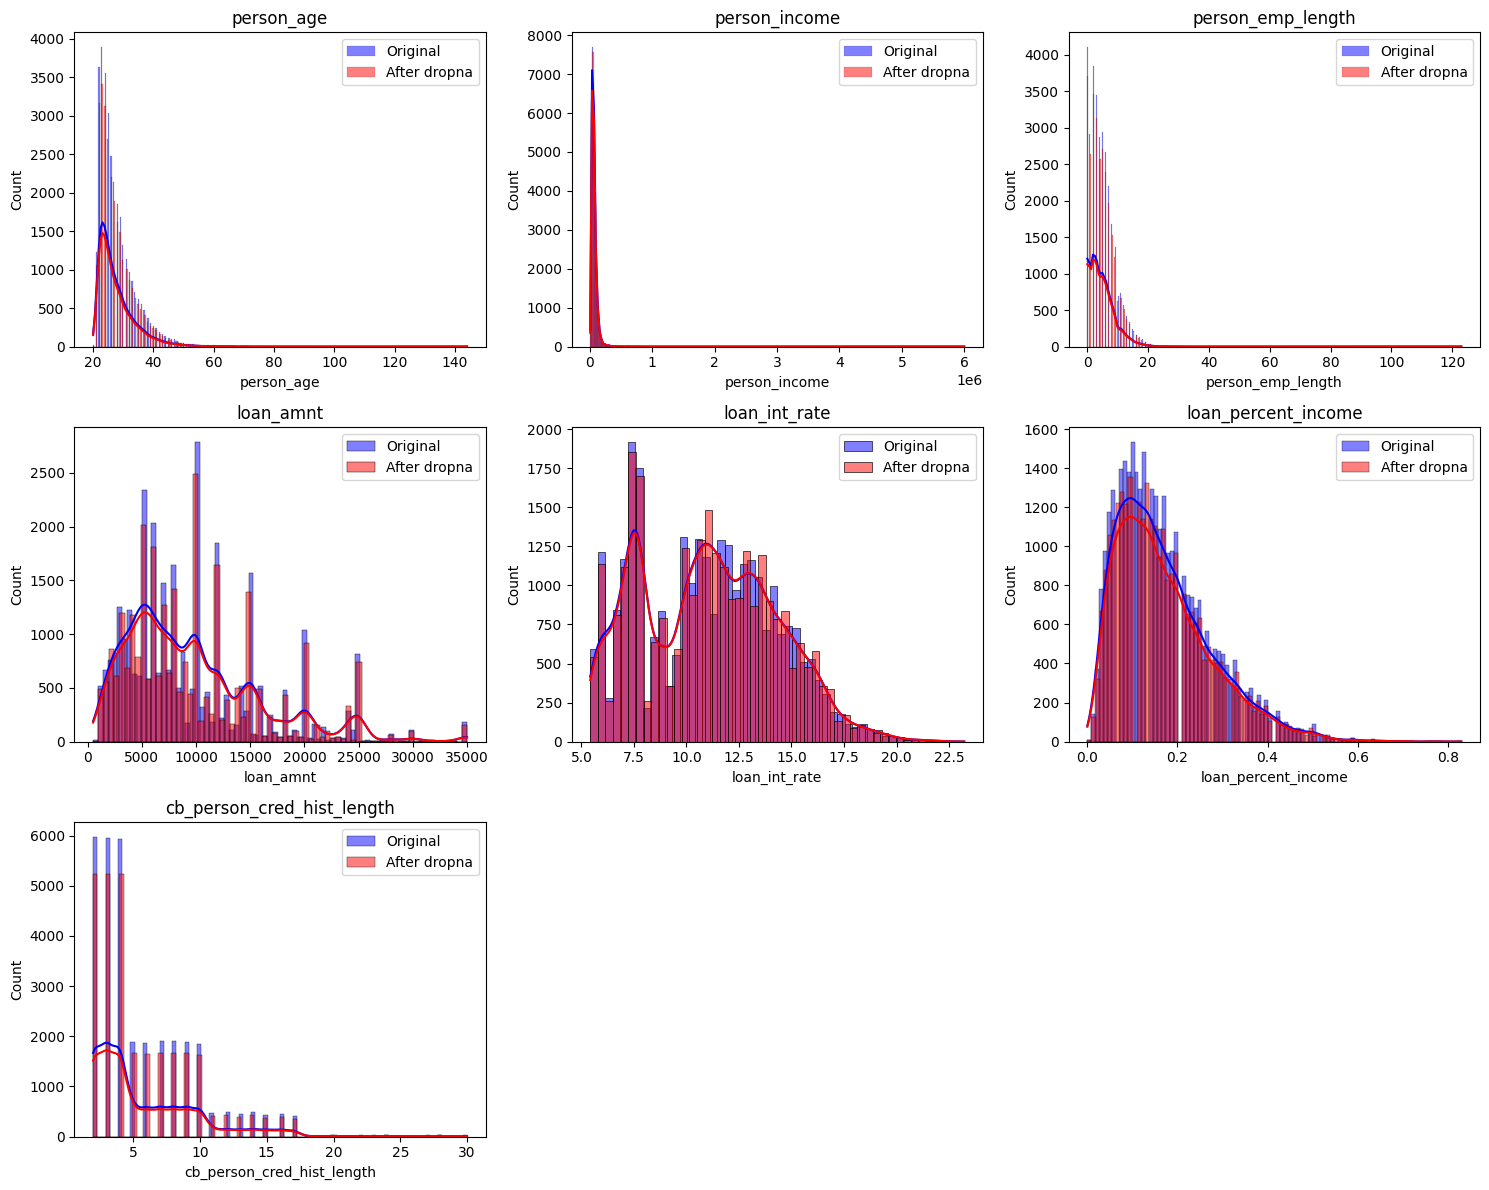

In [110]:
num_col = df.select_dtypes(include="number").columns
n_cols = 3
n_rows = math.ceil(len(num_col) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  

for i, col in enumerate(num_col):
    sns.histplot(df[col], kde=True, color='blue', alpha=0.5, label='Original', ax=axes[i])
    sns.histplot(dropna_df[col], kde=True, color='red', alpha=0.5, label='After dropna', ax=axes[i])
    axes[i].set_title(col)
    axes[i].legend()

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

> distribution look kind of the same before and after dropping missing values.

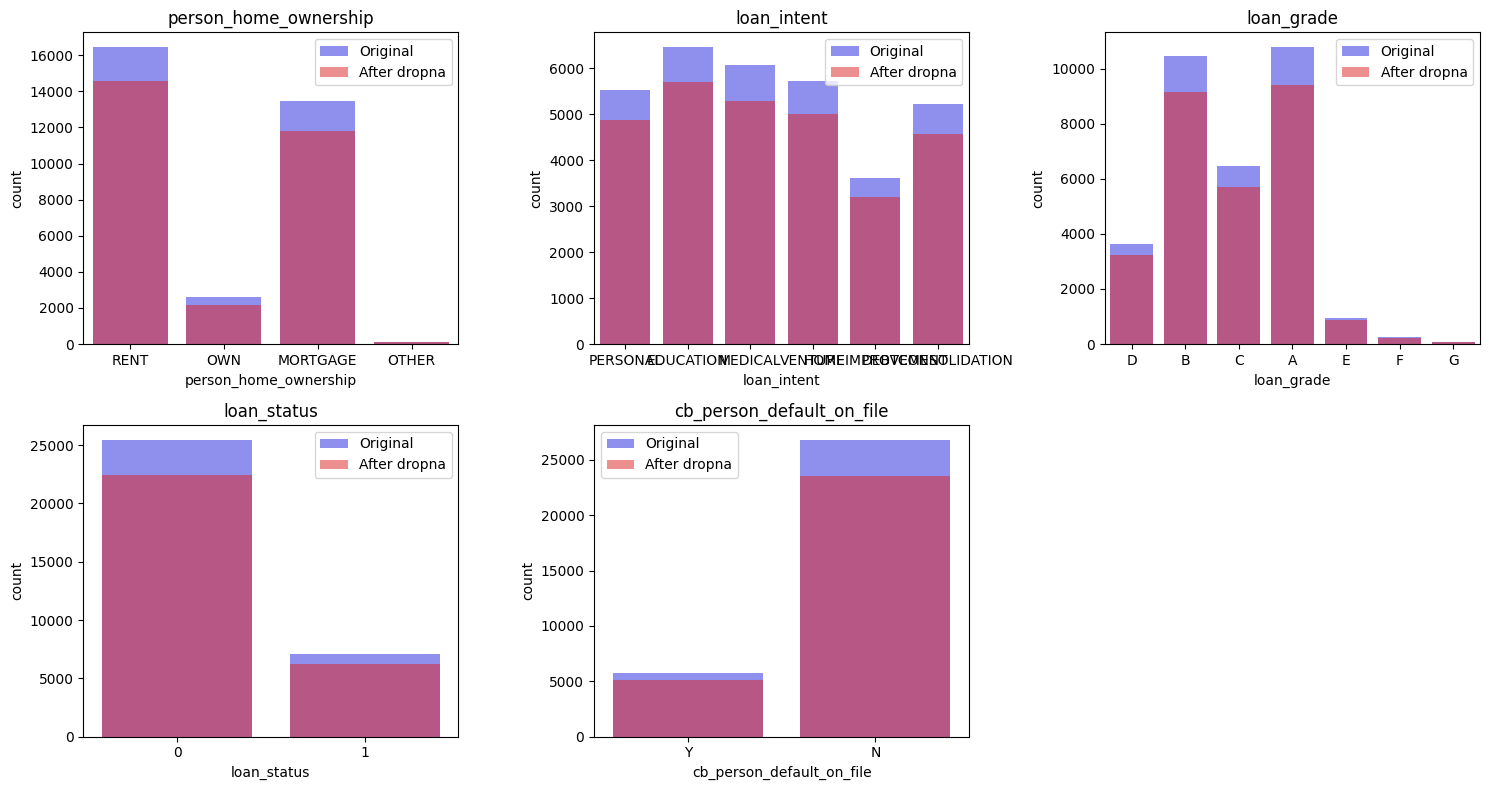

In [111]:

cat_col = df.select_dtypes(include="object").columns
n_cols = 3
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten() 

for i, col in enumerate(cat_col):
    if col == "load_intent":
        sns.countplot(x=df[col], color='blue', alpha=0.5, label='Original', ax=axes[i])
        sns.countplot(x=dropna_df[col], color='red', alpha=0.5, label='After dropna', ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_rotation(90)
        axes[i].legend()
    else:
        sns.countplot(x=df[col], color='blue', alpha=0.5, label='Original', ax=axes[i])
        sns.countplot(x=dropna_df[col], color='red', alpha=0.5, label='After dropna', ax=axes[i])
        axes[i].set_title(col)
        axes[i].legend()

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

> nothing really change to categorical columns after dropping missing values.
> Decision: We can drop the missing values

In [112]:
df = df.dropna().reset_index(drop=True)

In [113]:
for col in num_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: Found {len(outliers)} outliers = {(len(outliers)/len(df))*100:.2f}% of data")
    print("="*60)

person_age: Found 1298 outliers = 4.53% of data
person_income: Found 1329 outliers = 4.64% of data
person_emp_length: Found 773 outliers = 2.70% of data
loan_amnt: Found 1484 outliers = 5.18% of data
loan_int_rate: Found 6 outliers = 0.02% of data
loan_percent_income: Found 557 outliers = 1.94% of data
cb_person_cred_hist_length: Found 984 outliers = 3.44% of data


In [118]:
plt.figure(figsize=(8, 6))
num_col = df.select_dtypes(include="number").columns
fig = make_subplots(rows=3, cols=3, subplot_titles=num_col)

for i, col in enumerate(num_col):
    row = i // 3 + 1
    col_idx = i % 3 + 1
    fig.add_trace(
        go.Box(x=df[col], boxpoints='outliers', name=col, showlegend=False),
        row=row, col=col_idx
    )

fig.update_layout(
    height=1000, width=1200,
    title_text="Boxplots of Numeric Columns"
)

fig.show()

<Figure size 800x600 with 0 Axes>

In [115]:
df.query('person_age > 100')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
74,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
163,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
508,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
28388,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [116]:
print("age only 21-22 but employment length is 123 years")
df.query('person_emp_length > 40')

age only 21-22 but employment length is 123 years


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
186,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
28440,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25


In [117]:
# df = df.query('person_age <= 100 and person_emp_length <= 45')
# df.shape